# **Case Study – Cyclistic**

## **Scenario**

The director of marketing at Cyclistic, a fictional bike-share company in Chicago, believes the company’s future success depends on maximizing the number of annual memberships. Therefore, my marketing analyst team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, my team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

***Theory***: Before analyzing the case, I have the theory that members might use Cyclistic bikes principally for daily activities like commuting or buying basic stuff, while casual riders might use it more for leisure and recreation travels.


### ***Ask Phase***

### **Business Task:**

The goal of this project is to study Cyclistic’s historical trip data in the last year in order to understand how casual riders and annual members use Cyclistic bikes differently. 
From these insights, the marketing team will identify recommendations for designing strategies to convert casual riders into annual members, which will be presented to the executive team for approval.

### ***Prepare Phase***

### **Data Sources:**

The data sources used for this analysis are Cyclistic’s historical trip data stored in the last 12 months in 12 spreadsheets stored in CSV format, one for each month, covering data from 05-01-2022 to 04-30-2023. 

This is public data that has been provided by Motivate International Inc., which records real, original bike-share data in the city of Chicago; so the data is objective, unbiased and credible. The data sources are also comprehensive, accurate and relevant to solve our business problem because they include all the rides that have been taken by customer type, including date and time to calculate ride length and analyze trends based on day of week, month and season.

It’s important to address the data-privacy issues present in the license under which the data has been available to the public, which is based on Chicago’s regulatory data privacy policy; so, it’s not allowed to use riders’ personally identifiable information like their credit card information.

These spreadsheets are organized in a wide format, where each row represents one specific ride and the columns contain different attributes of the ride, which include the ride ID, the type of the bike, timestamps, the name of the stations in which the ride departed and arrived, coordinates for latitudes and longitudes and the type of customer.

### Installing packages needed for the analysis

Installing tidyverse, lubridate and ggplot packages:

In [1]:
library(tidyverse)
library(lubridate)
library(ggplot2)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Reading all the files for all the months of the year from May 1st, 2022 through April 30th, 2023
Creating 12 data frames while importing CSV files into R, with names cyclistic_202205 for May 2022, cyclistic_202206 for June 2022, up until cyclistic_202304 for April 2023:

In [2]:
cyclistic_202205 <- read.csv("/kaggle/input/cyclistic-bike-share-may-2022-though-april-2023/202205-divvy-tripdata.csv")
cyclistic_202206 <- read.csv("/kaggle/input/cyclistic-bike-share-may-2022-though-april-2023/202206-divvy-tripdata.csv")
cyclistic_202207 <- read.csv("/kaggle/input/cyclistic-bike-share-may-2022-though-april-2023/202207-divvy-tripdata.csv")
cyclistic_202208 <- read.csv("/kaggle/input/cyclistic-bike-share-may-2022-though-april-2023/202208-divvy-tripdata.csv")
cyclistic_202209 <- read.csv("/kaggle/input/cyclistic-bike-share-may-2022-though-april-2023/202209-divvy-publictripdata.csv")
cyclistic_202210 <- read.csv("/kaggle/input/cyclistic-bike-share-may-2022-though-april-2023/202210-divvy-tripdata.csv")
cyclistic_202211 <- read.csv("/kaggle/input/cyclistic-bike-share-may-2022-though-april-2023/202211-divvy-tripdata.csv")
cyclistic_202212 <- read.csv("/kaggle/input/cyclistic-bike-share-may-2022-though-april-2023/202212-divvy-tripdata.csv")
cyclistic_202301 <- read.csv("/kaggle/input/cyclistic-bike-share-may-2022-though-april-2023/202301-divvy-tripdata.csv")
cyclistic_202302 <- read.csv("/kaggle/input/cyclistic-bike-share-may-2022-though-april-2023/202302-divvy-tripdata.csv")
cyclistic_202303 <- read.csv("/kaggle/input/cyclistic-bike-share-may-2022-though-april-2023/202303-divvy-tripdata.csv")
cyclistic_202304 <- read.csv("/kaggle/input/cyclistic-bike-share-may-2022-though-april-2023/202304-divvy-tripdata.csv")

### Combining the Data Frames
Creating a new data frame all_trips to combine all the previous data frames into a single one:

In [3]:
all_trips <- bind_rows(cyclistic_202205, cyclistic_202206, cyclistic_202207, cyclistic_202208, cyclistic_202209, cyclistic_202210, cyclistic_202211, cyclistic_202212, cyclistic_202301, cyclistic_202302, cyclistic_202303, cyclistic_202304)

Inspecting our data:

In [4]:
colnames(all_trips)
nrow(all_trips)
dim(all_trips)
head(all_trips)
tail(all_trips)
str(all_trips)
summary(all_trips)
table(all_trips$member_casual)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] 5859061

[1] 5859061      13

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.89147,-87.62676,41.94367,-87.64895,member
2,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.88096,-87.61674,41.88635,-87.61752,member
3,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.88224,-87.64107,41.90765,-87.67255,member
4,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.88224,-87.64107,41.88458,-87.63189,member
5,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.88224,-87.64107,41.88578,-87.65102,member
6,C0A3AA5A614DCE01,classic_bike,2022-05-04 14:48:55,2022-05-04 14:56:04,Carpenter St & Huron St,13196,Sangamon St & Washington Blvd,13409,41.89456,-87.65345,41.88316,-87.65110,member


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5859056,A17D800CE963661A,classic_bike,2023-04-11 15:46:42,2023-04-11 15:50:03,Michigan Ave & Lake St,TA1305000011,Clark St & Randolph St,TA1305000030,41.88602,-87.62440,41.88458,-87.63189,member
5859057,8B441A6C436E9900,classic_bike,2023-04-29 21:20:21,2023-04-29 21:30:19,Halsted St & 18th St,13099,Blue Island Ave & 18th St,13135,41.85751,-87.64599,41.85756,-87.66154,casual
5859058,3980D64BE11540F1,classic_bike,2023-04-24 09:16:05,2023-04-24 09:22:27,Halsted St & 18th St,13099,Blue Island Ave & 18th St,13135,41.85751,-87.64599,41.85756,-87.66154,casual
5859059,3EF4B49FF7DAA02C,classic_bike,2023-04-18 07:53:51,2023-04-18 07:59:16,Franklin St & Jackson Blvd,TA1305000025,Clark St & Randolph St,TA1305000030,41.87771,-87.63532,41.88458,-87.63189,casual
5859060,210B2ED6583DC231,classic_bike,2023-04-29 07:33:55,2023-04-29 07:38:57,Michigan Ave & Lake St,TA1305000011,Clark St & Randolph St,TA1305000030,41.88602,-87.62440,41.88458,-87.63189,casual
5859061,D29CB39B9E3FC46A,electric_bike,2023-04-18 08:00:32,2023-04-18 08:02:35,Franklin St & Jackson Blvd,TA1305000025,Clark St & Ida B Wells Dr,TA1305000009,41.87813,-87.63525,41.87593,-87.63058,casual


'data.frame':	5859061 obs. of  13 variables:
 $ ride_id           : chr  "EC2DE40644C6B0F4" "1C31AD03897EE385" "1542FBEC830415CF" "6FF59852924528F8" ...
 $ rideable_type     : chr  "classic_bike" "classic_bike" "classic_bike" "classic_bike" ...
 $ started_at        : chr  "2022-05-23 23:06:58" "2022-05-11 08:53:28" "2022-05-26 18:36:28" "2022-05-10 07:30:07" ...
 $ ended_at          : chr  "2022-05-23 23:40:19" "2022-05-11 09:31:22" "2022-05-26 18:58:18" "2022-05-10 07:38:49" ...
 $ start_station_name: chr  "Wabash Ave & Grand Ave" "DuSable Lake Shore Dr & Monroe St" "Clinton St & Madison St" "Clinton St & Madison St" ...
 $ start_station_id  : chr  "TA1307000117" "13300" "TA1305000032" "TA1305000032" ...
 $ end_station_name  : chr  "Halsted St & Roscoe St" "Field Blvd & South Water St" "Wood St & Milwaukee Ave" "Clark St & Randolph St" ...
 $ end_station_id    : chr  "TA1309000025" "15534" "13221" "TA1305000030" ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng

   ride_id          rideable_type       started_at          ended_at        
 Length:5859061     Length:5859061     Length:5859061     Length:5859061    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:5859061     Length:5859061     Length:5859061     Length:5859061    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            


 casual  member 
2358307 3500754 

### ***Prepare Phase***
### Adding new Columns 
Adding columns date, month, date, year and day_of_week to get the date as yyyy-mm-dd, month and day as number, and year as full year of each ride:

In [5]:
all_trips$date <- as.Date(all_trips$started_at)
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")

Adding column ride_length in seconds:

In [6]:
all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at)

Changing ride_length format from Factor to numeric:

In [7]:
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))

### Removing Data with mistakes
Removing data rows where the start_station_name was “HQ QR” or the ride_length was negative and creating a new data frame all_trips_v2 to store and export the data cleaned up and prepared for analysis:

In [8]:
all_trips_v2 <- all_trips[!(all_trips$start_station_name == "HQ QR" | all_trips$ride_length<0),]

### Inspecting the column Ride_length
Calculating statistics of the column ride_length:

In [9]:
mean(all_trips_v2$ride_length)
median(all_trips_v2$ride_length)
max(all_trips_v2$ride_length)
min(all_trips_v2$ride_length)
summary(all_trips_v2$ride_length)

[1] 1136.286

[1] 599

[1] 2483235

[1] 0

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     339     599    1136    1075 2483235 

Aggregating data based on customer type to find insights about how members and casual customers use Cyclistic bikes differently:

In [10]:
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = mean)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = median)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = max)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = min)

all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,1709.6796
member,750.0187


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,751
member,520


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,2483235
member,93580


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,0
member,0


Ordering the day_of_week column so it starts on Sunday and is sorted correctly until Saturday:

In [11]:
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

### **Data Cleaning Documentation**
### **Change Log**

*Version 2.0.0 (05-30-2023)*

**New**

- The R program was selected for its high functionality at cleaning data. Created 12 data frames while importing CSV files into R, with names cyclistic_202205 for May 2022, cyclistic_202206 for June 2022, up until cyclistic_202304 for April 2023.
- Created a new data frame all_trips to combine all the previous data frames into a single one.
- Added columns date, month, date, year and day_of_week to get the date as yyyy-mm-dd, month and day as number, and year as full year of each ride.
- Added column ride_length in seconds.
- Created a new data frame all_trips_v2 to store and export the data cleaned up and prepared for analysis.
- Created new data frame counts to store summary data of the mean of ride_length aggregated by user type and day of week.

**Changes**

- Changed ride_length format from Factor to numeric.
- Ordered the day_of_week column so it starts on Sunday = 1 and is sorted in ascending order until Saturday = 7.

**Removed**

- Removed data rows where the start_station_name was “HQ QR” or the ride_length was negative because these include bikes that were taken out of circulation for quality control and inspection.

After these steps it's confirmed that the data is integral, clean and ready to analyze.

### ***Analyze and Share Phases***
### **Analyzing and Visualizing Data**
First we're going to analyze our data by grouping by customer types and day of week, and then calculating the number of rides and average ride length:

In [12]:
all_trips_v2 %>%
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarize(number_of_rides = n(), average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,388811,2006.2732
casual,Mon,275748,1702.1047
casual,Tue,272648,1520.1513
casual,Wed,284575,1450.3821
casual,Thu,318467,1481.9947
casual,Fri,350081,1651.1089
casual,Sat,467923,1934.6068
member,Sun,402066,829.4256
member,Mon,484560,718.6881


Creating a visual based on that analysis. A column chart is optimal to visualize trends about the quantity of rides both types of customers take by day of week:

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


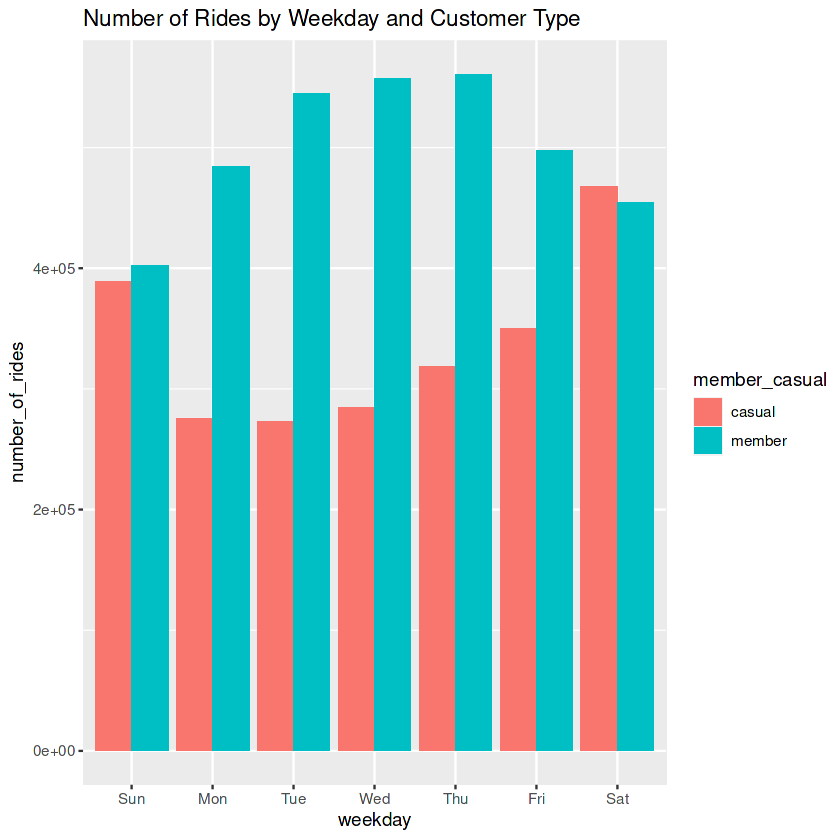

In [13]:
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")+
  labs(title="Number of Rides by Weekday and Customer Type")

Creating another similar visual to spot trends about the average ride length for both types of customers by day of week:

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


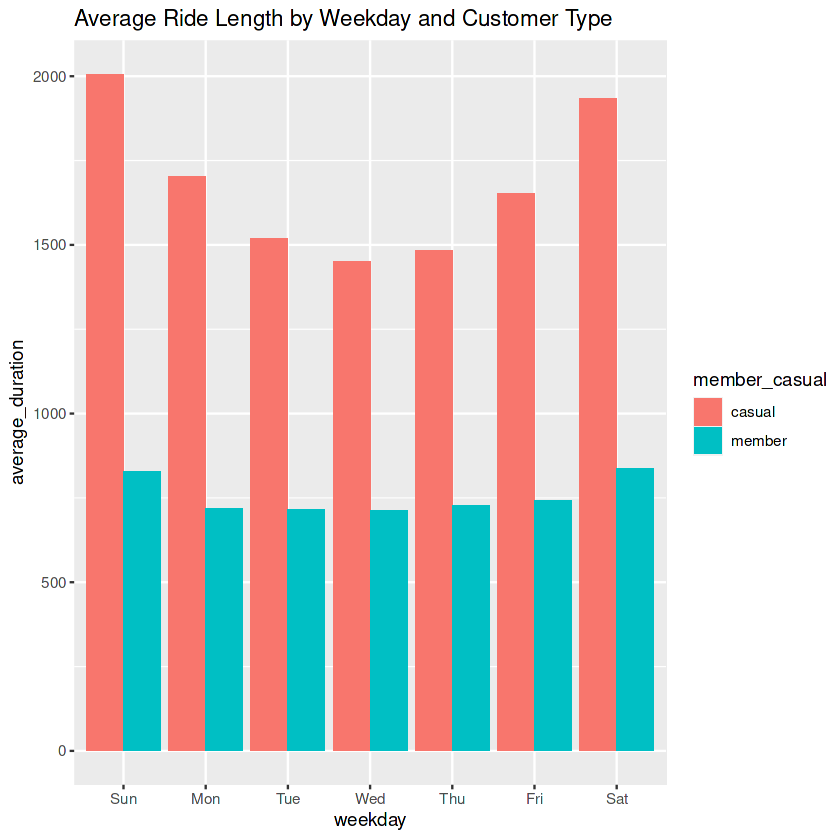

In [14]:
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")+
  labs(title="Average Ride Length by Weekday and Customer Type")

Creating a line chart for each type of customers by month to spot seasonal trends:

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


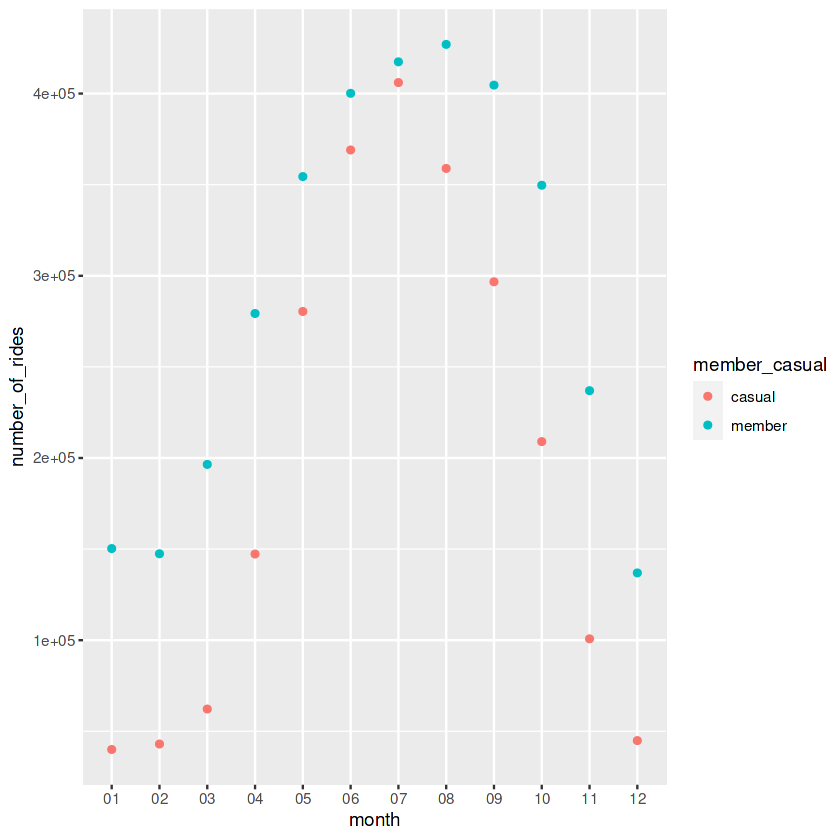

In [15]:
all_trips_v2 %>% 
  group_by(member_casual, month) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, month)  %>% 
  ggplot(aes(x = month, y = number_of_rides, color = member_casual)) +
  geom_point()

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


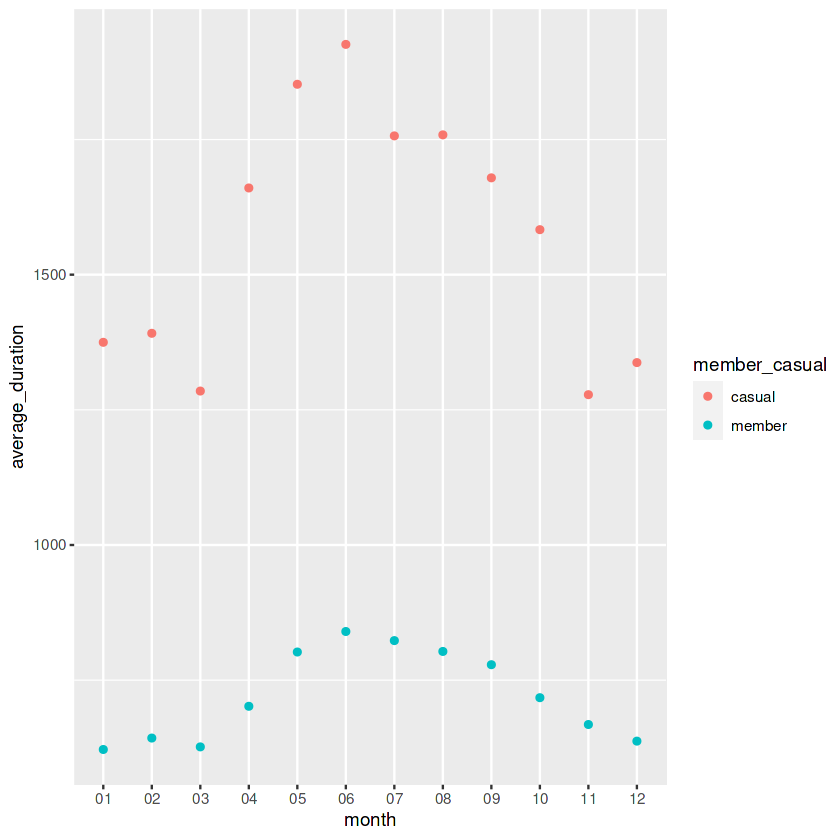

In [16]:
all_trips_v2 %>% 
  group_by(member_casual, month) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, month)  %>% 
  ggplot(aes(x = month, y = average_duration, color = member_casual)) +
  geom_point()

## Summary of the Analysis

The data was organized with days of the week from Sunday=1 to Saturday=7, sorted in ascending order. It was also sorted from month January=1 to December=12 in ascending order.
The data was formatted with dates yyyy-mm-dd, days of week in string format, months in number format and ride length in seconds. The data was filtered to rides where bikes were not part of Quality Control.
Insights and trends that were discovered from the analysis:
- Members take much more rides than casual customers on weekdays, but the number of rides stabilizes on weekends. 
- Members take more rides overall compared to casual members, with the exception of Saturdays.
- The average ride length for casual customers is much longer than members for all days of the week.
- Rides are longer for both types of customers on the weekends. 
- For casual customers, the average ride length is somewhat higher on Mondays and Fridays than the rest of the weekdays, while for members it’s steadier overall.
- Both types of customers take more bike rides from the end of spring through early autumn, reaching its spike in the summer and its trough in the winter.
- Casual customers also take longer rides in that part of the year, from April through October, while for members this trend is less prominent. 

These insights help to answer the business question by providing ways in which both types of customers use Cyclistic bikes differently, because it helps us compare how many rides and how long those rides last for members and casual customers by day of the week, by month, by season and overall. 

This way, important insights were discovered by analyzing trends in weekdays and weekends for both types of customers to find out the reasons why they make use of the Cyclistic bikes. The insights found of members taking more rides on weekdays but shorter ones helped come to the conclusion that members use Cyclistic rides mainly for commuting and day-to-day travels while casual users use them mainly for leisure.


### ***Act Phase***

### **Conclusions**
- On weekdays, members take more rides but their travels are much shorter. 
- On the weekends, both types of customers take the same amount of rides but casual customers take much longer rides.
- **Casual customers use bikes mainly for leisure, while members use them mainly for commuting**.
- Overall, members take more rides, whereas casual customers take longer rides. 
- Overall, people take more rides in the summer and less in the winter.
- In the summer, casual customers also take longer rides, while members’ travel length remain steadier.

### **Recommendations**
1. Address casual customers with marketing campaigns for commuting and day-to-day activities: 
Since casual customers use Cyclistic bikes mainly for leisure, Cyclistic needs to address this type of customers with marketing campaigns that focuses on the benefits of using their bikes for commuting and day-to-day activities.

2. Adjust Cyclistic pricing plans limits:
Casual customers take much longer rides than members; adjusting the limits and restrictions for their pricing plans like maximum time of travel could encourage casual members to convert into annual members.

3. Address casual customers with promotional activities during the winter:
There is a trough in bike rides in the winter; promotional activities during this time could increase the number of casual riders converting into annual members. 

4. Consider how Cyclistic can optimize docking station practices during the summer:
Cyclistic bike travels are generally high and stable during the summer, which is an ideal time to optimize docking station practices as the Cyclistic rides are predictable.



